# Final Project

## HW 8 Submission
 1. 
- After calculating the growth rate of stock prices and interest rate over time, I have plotted the growth rate of   these series over time.
- Since my data is time series, I have first made lineplots to understand the nature of the series over time.
- I have made autocorrelation plots of these series to check randomness in data at varying time lags.
- For Analysis, I have performed the Dicky Fuller Test on each series to check for stationarity. Since these series   are not stationary and their statistical properties such as mean, variance, autocorrelation vary with time, we     can not prediction over these series.
- For this reason, I calculated the growth rate of these series over time and visualized it. Then, I performed the   Dicky Fuller Test on the growth rate of these series. The growth rate of all of these series came out to be         stationary as proved by the significance of the DF Test.
- I will now perform prediction of these stock market indication using time series forecasting techniques. I will     also do Pearson's Correlation Test between Interest Rate and Stock Market Prices to see how Interest Rate           impacts these indicators and whether this impact is in the short-run or in the long-run. 
- I will also calculate the percentage risk of these Stocks based on data of the last 5 years.
 2.  
#### Advanced Visualizations
- I have made interactive plots with multiple series to illustrate the relationship between prices of different       stocks and to make it easier to isolate one region or timeframe and see the trajectory of prices and interest       rate at point of interest.
- I have made animated plots to see the how these series move over time and compare to each other.


### Data Collection
Data Sources:
1. Yahoo Finance Library
    
    Collected from yfinance library
    
    Stock Market Indicators Data


2. Federal Reserve Economic Data
    
    Collected using Api Key from https://fred.stlouisfed.org/docs/api/fred/
    
    Interest Rate Data

#### Importing Requirements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import matplotlib
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import yfinance as yf
%matplotlib qt
from fredapi import Fred     ## Importing Data From Fred
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [7]:
## Importing Stock Data From Yahoo Finance
aapl = yf.download(tickers='AAPL', period='1000d', interval='1d',inplace=True)  # Apple
google  = yf.download(tickers='GOOG',  period='1000d', interval='1d',inplace=True)  # Google
amazon  = yf.download(tickers='AMZN',  period='1000d', interval='1d',inplace=True)  # Amazon
tesla  = yf.download(tickers='TSLA',  period='1000d', interval='1d',inplace=True) #TESLA

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#Importing Data From Fred
fred = Fred(api_key='0e8891afccdf0b465cf8915bc862e116')
data = fred.get_series('DFF')

In [9]:
# Making a dataframe of Interest Rate data from Fred
data = pd.DataFrame(data)
data.columns = ['IR']
data = data.reset_index()
data = data.rename(columns={'index':'Date'})
data = data.iloc[23989:24989] #Using the last 1000 rows

### Merging the stocks data into one dataset for Analysis

In [10]:
result = pd.merge(aapl, google, on="Date")
result = result.drop(columns={'Open_x','High_x','Low_x','Open_y','High_y','Low_y','Close_x','Close_y'})
result = result.rename(columns={'Adj Close_x': 'Apple_Closing','Adj Close_y':'Google_Closing',
                        'Volume_x':'Apple_Volume','Volume_y':'Google_Volume'})
output = pd.merge(result,amazon, on = "Date")
output_th = pd.merge(output, tesla , on = "Date")
output_th = output_th.drop(columns={'Open_x','High_x','Low_x','Open_y','High_y','Low_y','Close_x','Close_y'})
output_th = output_th.rename(columns={'Adj Close_x': 'Amazon_Closing','Adj Close_y':'Tesla_Closing',
                            'Volume_x':'Amazon_Volume','Volume_y':'Tesla_Volume'})
final = pd.merge(output_th, data , on = "Date")
final = final.set_index('Date')


In [201]:
#Using a smaller sample of data for Animated Visualizations
final_dyn = final.iloc[700:]
final_dyn = final_dyn.reset_index()
final_dyn = final_dyn.rename(columns={'index':'Date'})

### Data Visualization

In [151]:
# Making an animated plot that shows the timeseries trend in Interest Rate in the US from 2018 to 2022

y1 = [df1['IR'][i] for i in df1.index]
t = [df1['Date'][i] for i in df1.index]
x,y=[], []
fig = plt.figure(figsize=(12,8))
axes = fig.add_subplot(1,1,1)
def animate(i):
#     y = y1
#     x= t
    x.append((t[i]))
    y.append((y1[i]))
    plt.plot(x,y, scaley=True, scalex=True, color="blue",label='Interest Rate')
ani = FuncAnimation(fig=fig, func=animate, interval=100)
# ani.show()

In [203]:
# Making an animated plot that shows the time series trend in Closing Prices of Stocks over Time
#The plot illustrates how the stock prices change over time and relate to each other
#It illustrates how the prices move drastically change after COVID-19

a = [final_dyn['IR'][i] for i in final_dyn.index]
b = [final_dyn['Google_Closing'][i] for i in final_dyn.index]
c = [final_dyn['Apple_Closing'][i] for i in final_dyn.index]
d = [final_dyn['Amazon_Closing'][i] for i in final_dyn.index]
f = [final_dyn['Tesla_Closing'][i] for i in final_dyn.index]
e = [final_dyn['Date'][i] for i in final_dyn.index]
# labels=['Google Closing Price','Interest Rate', 'Apple Closing Price',
#         'Amazon Closing Price', 'Tesla Closing Price']
my_labels={'g':'Google Closing Price','h':'Interest Rate',
           'j':'Apple Closing Price','k':'Amazon Closing Price','l':'Tesla Closing Price'}
# plt.legend(labels,loc="best")
x1,y1,y2,y3,y4,y5=[], [],[],[],[],[]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))
plt.title("Interest Rate and Stocks Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
def animate(i):
    x1.append(e[i])
    y1.append((b[i]))
    y2.append((c[i]))
    y3.append((a[i]))
    y4.append((d[i]))
    y5.append((f[i]))
    g=axes.plot(x1,y1, color="blue", linewidth=0.5,label=my_labels['g'])   
    my_labels["g"] = "_nolegend_"
    h=axes.plot(x1,y3, color="red", linewidth=0.5,label=my_labels['h'])
    my_labels["h"] = "_nolegend_"
    j=axes.plot(x1,y2, color="orange", linewidth=0.5,label=my_labels['j'])
    my_labels["j"] = "_nolegend_"
    k=axes.plot(x1,y4, color="green", linewidth=0.5,label=my_labels['k'])    
    my_labels["k"] = "_nolegend_"
    l=axes.plot(x1,y5, color="purple", linewidth=0.5,label=my_labels['l']) 
    my_labels["l"] = "_nolegend_"
    axes.legend(loc='upper right', bbox_to_anchor=(1, 1))

#     return g,h,j,k,l
        
        
ani = FuncAnimation(fig=fig, func=animate, interval=40)

In [165]:
final.plot(subplots=True, figsize=(10, 12))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

### Checking the nature of timeseries trend in stock prices and their relation with each other to be able to think about its forecasting and Time Series Analysis



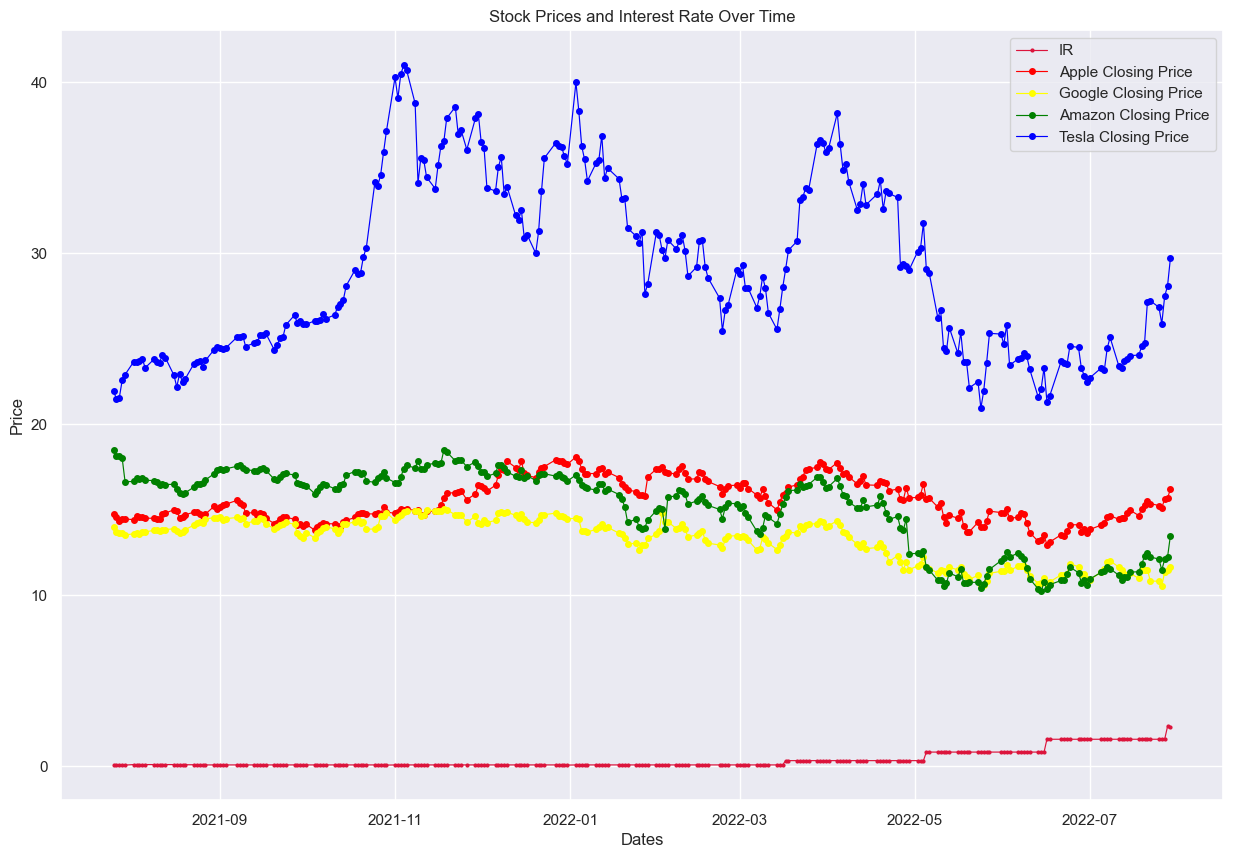

In [44]:
final1 = final.iloc[:,0:8]/10
start, end = '2021-07-25', '2022-07-29'

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(final.loc[start:end, 'IR'], marker='.', markersize=4, linestyle='-', linewidth = 0.85, label='IR', color='crimson')
ax.plot(final1.loc[start:end, 'Apple_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Apple Closing Price', color='red')
ax.plot(final1.loc[start:end, 'Google_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Google Closing Price', color='yellow')
ax.plot(final1.loc[start:end, 'Amazon_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Amazon Closing Price', color='green')
ax.plot(final1.loc[start:end, 'Tesla_Closing'], marker='o', markersize=4, linestyle='-',linewidth = 0.85, label='Tesla Closing Price', color='blue')


ax.set_ylabel("Price")
ax.set_xlabel("Dates")
ax.set_title("Stock Prices and Interest Rate Over Time")
ax.legend()

### Making interactive plots to be able to see more through the data by selecting the series that we want to see isolated and together with each other

In [210]:
import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf

cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

In [212]:
final[['Google_Closing','Apple_Closing','Amazon_Closing','Tesla_Closing','IR']].iplot(title='Closing Price of Stocks Over Time', xTitle='Dates',yTitle='Closing Price', fill=True,colors=['orange','lightgreen','yellow','lightblue','red'])


In [ ]:
# final['Google_Closing'].iplot(title='MSFT Adjusted Close',bestfit=True, bestfit_colors=['blue'])
# import statsmodels.api as sm
qf=cf.QuantFig(tesla,title='Apple Stocks Closing Price Over Time',yTitle='Closing Price',xTitle='Dates')
qf.add_sma([10,30],width=2,color=['blue','lightblue'])
qf.add_bollinger_bands()
qf.add_volume()
qf.iplot()

In [213]:
final[['Apple_Volume', 'Google_Volume','Tesla_Volume','Amazon_Volume']].iplot(title='Trends in Volumes of Stocks over time', xTitle='Dates',yTitle='Stock Volume',colors=['green','purple','red','blue'])


### Since the visualizations show that the stock closing price series and the interest rate series are not stationary series, I am plotting the growth/return of these series to see whether their growth is stationary and hence can be predicted. 
### Plotting the Growthr Rate of Closing Price Series of all Stocks

In [250]:
# aapl = aapl.reset_index()
# aapl = aapl.rename(columns={'index':'Date'})
aapl['Return'] = aapl['Adj Close'].pct_change()
aapl['Return'].plot()
plt.title('Plotting Growth of the Price Series for Apple Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [252]:
# google = google.reset_index()
tesla['Return']=tesla['Adj Close'].pct_change()
tesla['Return'].plot()
plt.title('Plotting Growth of the Price Series for Tesla Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [253]:
# google = google.reset_index()
google['Return']=google['Adj Close'].pct_change()
google['Return'].plot()
plt.title('Plotting Growth of the Price Series for Google Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [254]:
amazon['Return']=amazon['Adj Close'].pct_change()
amazon['Return'].plot()
plt.title('Plotting Growth of the Price Series for Amazon Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [279]:
data['IR_growth']=data['IR'].pct_change()
data['IR_growth'].plot()
plt.title('Plotting Growth of the Interest Rate Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Using Statistical Tests to Formalize the Insights
#### Checking the stationarity of stock price timeseries data using the Dicky Fuller Test that uses Null Hypothesis Significance Testing
    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [259]:
X = final['Tesla_Closing'].values
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Tesla: -1.395737
p-value: 0.584318
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#####  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
Closing prices of Tesla's stocks are not stationary hence we can not do forecasting on this series. 
Next we will check the growth rate of this series to see if it is stationary and then forecast its growth 

In [70]:
X = final['Apple_Closing'].values
result = adfuller(X)
print('ADF Statistic for Interest Rate: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Interest Rate: -1.484930
p-value: 0.540953
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#####  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
Closing prices of Apple's stocks are not stationary hence we can not do forecasting on this series. 
Next we will check the growth rate of this series to see if it is stationary and then forecast its growth 

In [71]:
X = final['Amazon_Closing'].values
result = adfuller(X)
print('ADF Statistic for Interest Rate: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Interest Rate: -1.625350
p-value: 0.469925
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#####  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
Closing prices of Amazon's stocks are not stationary hence we can not do forecasting on this series. 
Next we will check the growth rate of this series to see if it is stationary and then forecast its growth 

In [72]:
X = final['Google_Closing'].values
result = adfuller(X)
print('ADF Statistic for Interest Rate: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Interest Rate: -1.467662
p-value: 0.549443
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#####  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
Closing prices of Google's stocks are not stationary hence we can not do forecasting on this series. 
Next we will check the growth rate of this series to see if it is stationary and then forecast its growth 

In [283]:
X = data['IR'].values[1:]
result = adfuller(X)
print('ADF Statistic for Interest Rate: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    


ADF Statistic for Interest Rate: 2.038772
p-value: 0.998721
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#####  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
Interest Rate series is not stationary hence we can not do forecasting on this series. 
Next we will check the growth rate of this series to see if it is stationary and then forecast its growth 

### After running the Dicky Fuller Test on the Closing Price and Interest Rate Series, I will now run the Dicky Fuller Test on the growth of each these series to check for Stationary

In [285]:
X = aapl['Return'].values[1:]
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Tesla: -10.168199
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
   The growth rate of Apple's Stock's Closing Price is Stationary 

In [287]:
X = tesla['Return'].values[1:]
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Tesla: -31.837718
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
   The growth rate of Tesla's Stock's Closing Price is Stationary 

In [ ]:
X = amazon['Return'].values
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
   The growth rate of Amazon's Stock's Closing Price is Stationary 

In [ ]:
X = google['Return'].values
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
   The growth rate of Google's Stock's Closing Price is Stationary 

In [289]:
X = data['IR_growth'].values[1:]
result = adfuller(X)
print('ADF Statistic for Tesla: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Tesla: -31.928389
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#### p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
   The growth rate of Interest Rate Series is Stationary 

## Checking Randomness in Data by Making Autocorrelation Plots of our Series

In [290]:
plot_acf(final['IR'], lags=50)
plt.title("Autocorrelation of Interest Rate")
# Show the AR as a plot
plt.xlabel('Lags')
plt.show()

In [292]:
plot_acf(final['Apple_Closing'], lags=50)
plt.title("Autocorrelation of Apple Closing Price")
plt.xlabel('Lags')
# Show the AR as a plot
plt.show()

In [293]:
plot_acf(final['Amazon_Closing'], lags=50)
plt.title("Autocorrelation of Amazon Closing Price")
plt.xlabel('Lags')
plt.show()

In [294]:
plot_acf(final['Tesla_Closing'], lags=50)
plt.title("Autocorrelation of Tesla Closing Price")
plt.xlabel('Lags')
plt.show()

In [295]:
plot_acf(final['Google_Closing'], lags=50)
plt.title("Autocorrelation of Google Closing Price")
plt.xlabel('Lags')
plt.show()

### Interpreting the Auto Correlation Plots


### Stock Market Prediction Analysis

In [ ]:
aaplpct.sort_values(inplace=True, ascending=True)
# Use quantile method
aapl90 = aaplpct.quantile(0.1).round(4) # for 90%
aapl95 = aaplpct.quantile(0.05).round(4)# for 95%
aapl99 = aaplpct.quantile(0.01).round(4)# for 99%

In [ ]:
from tabulate import tabulate
print(tabulate([['90%', aapl90], ['95%', aapl95], ['99%', aapl99]], headers=['Confidence Level', 'Value at Risk'],tablefmt='pretty'))

In [ ]:
###  Apple’s stock loss will not exceed -4.4% on a single day with a confidence level of 99% based on its historical values over the last 6 years.